In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

### Getting the dataset

We will use MNIST database


In [2]:
# Setup Training dat
train_data= datasets.FashionMNIST(
    root= 'data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None # Transforming label? No.
)

# Setup testing Data

test_data=datasets.FashionMNIST(
    root='data',
    train= False, # if false, then it willbe testing dataset
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
image,label= train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
class_name=train_data.classes

In [5]:
class_to_idx= train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image.shape, class_name[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

### Visualize our data

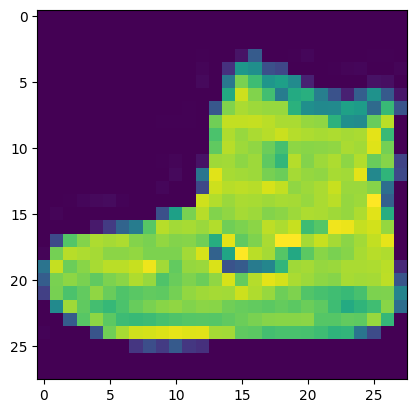

In [7]:
plt.imshow(image.squeeze())

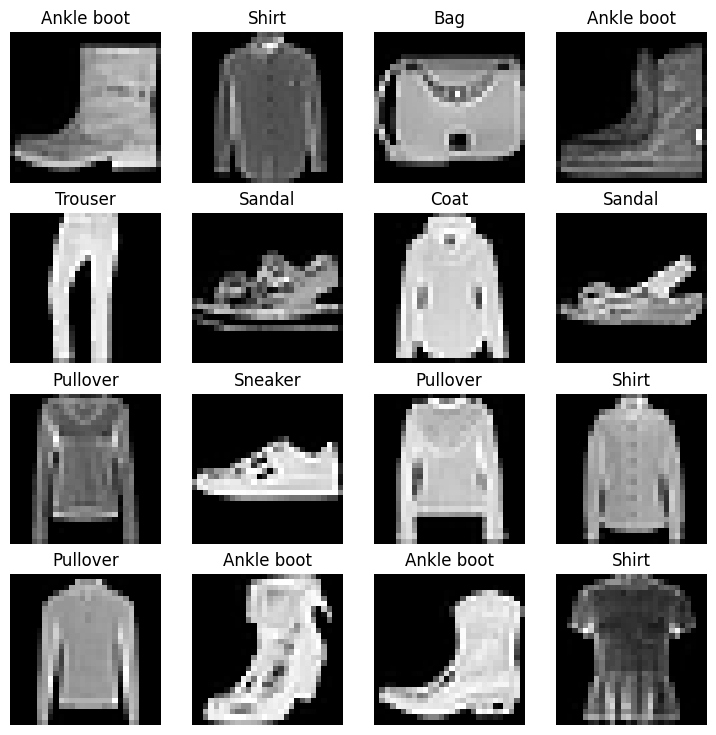

In [8]:
# plot more images
torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx= torch.randint(0,len(train_data),size=[1]).item()
    img, label= train_data[random_idx]
    # print(label)
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_name[label])
    plt.axis(False)


### Prepare the dataloader
`torch.utils.data` 

In [9]:
from torch.utils.data import DataLoader

batch_size=32

train_data_loader=DataLoader(dataset=train_data,batch_size=batch_size,shuffle=True)

test_data_loader=DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

In [10]:
# Lets checkout 
print(f'DataLoader: {train_data_loader, test_data_loader}')
print(f'Length of Data Loaders : {len(train_data_loader),len(test_data_loader)}')

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D84EC30E0>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D853FD810>)
Length of Data Loaders : (1875, 313)


In [11]:
train_features_batch,train_label_batch=next(iter(train_data_loader))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

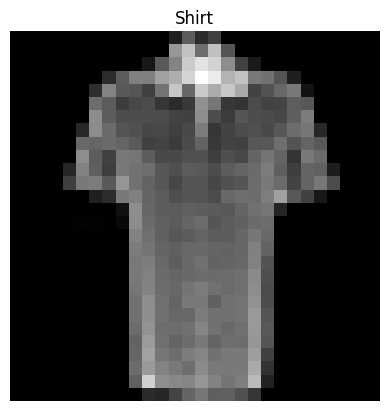

In [12]:
# show a sample
torch.manual_seed(42)
random_idx= torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_name[label])
plt.axis(False)

### Building the model
Start with baseline model
it is simple. But day by day , improve the model and add complexity

In [13]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [14]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [15]:
torch.manual_seed(42)

# Need to setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_name) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Setup loss, optimizer and evaluation metrics

* Using accuracy as evaluation metrics

In [16]:
import requests
from pathlib import Path

request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [17]:
from helper_functions import accuracy_fn

# Setup loss function

loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### Creating a function to time our experiments

Machine learning is very experimental

Two of the main things we will often want to track on are:
* Model's performance (loss and accuracy) 
* How fast does it run??

In [18]:
# we will see how our code run fast in `cpu` and `cuda`
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device= None):
    """Print difference between start and end time"""
    total_time= end-start
    print(f"Train time on {device}:{total_time: .3f}")
    return total_time

In [19]:
start_time=timer()
end_time=timer()

print_train_time(start=start_time,end=end_time, device='cpu')

Train time on cpu: 0.000


2.6400004571769387e-05

### Creating a training loop and training a model on batches of data

1. loop through epochs
2. loop through training batches, perform training stepes, calculate the train loss *per_batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happenin'
5. Time it all( for fun)

Highlight that the optimizer will update a model's parameters once per batch rather than once per epoch

In [20]:
# import tqdm . it will give us progress bar
import tqdm
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu= timer()

# set the number of epochs
epochs=3

# create traininfg and test loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch} \n------')

    #training
    train_loss=0
    # add a loop to loop through the training batch
    for batch, (X,y) in enumerate(train_data_loader):
        model_0.train()

        #forward pass
        y_pred=model_0(X)

        loss= loss_fn(y_pred,y)
        train_loss +=loss #accumulate train loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #print out
        if batch%400==0:
            print(f'Looked at {batch*len(X)}/{len(train_data_loader.dataset)} samples')
    
    # ajust the training batch- divide total train loss by length of train dataloader
    train_loss /=len(train_data_loader)

    ### testing
    test_loss,test_acc=0,0
    model_0.eval()

    with torch.inference_mode():
        for X_test, y_test in test_data_loader:
            #forward pass

            test_pred=model_0(X_test)

            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true= y_test, y_pred=test_pred.argmax(dim=1)) ## we are comparing label to label. y values contain label

        # Calculate the test loss average per batch
        test_loss /= len(test_data_loader)

        # Calculate the test acc average per batch
        test_acc /=len(test_data_loader)
    
    #print out    
    print(f'\nTrain loss : {train_loss:.4f} | Test loss: {test_loss :.4f}, Test acc: {test_acc:.4f}')

# Calculate training time
train_time_end_on_cpu= timer()
total_train_time_model_0= print_train_time(start=train_time_start_on_cpu, end= train_time_end_on_cpu, device= str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1 
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2 
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss : 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 13.890


### Make prediction and get Model_0 results

In [21]:
torch. manual_seed(42)

## You can use this function when ever you need. no matter what the data is  ##
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc=0,0
    model.eval()
    with torch. inference_mode():
        for X,y in tqdm(data_loader):
           # make predictions
           y_pred = model(X)

           # accumulate the loss and acc values per batch
           loss +=loss_fn(y_pred,y)
           acc +=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /=len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name':model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc}

# Calculate model_0 results on test datasets
model_0_results = eval_model(model=model_0,          
                            data_loader=test_data_loader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results
            

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup device-agnostic code

In [22]:
import torch

device= 'cuda' if torch.cuda.is_available() else 'cpu'

### Model_1 : Building a better model with non-linearity

In [23]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units:int,
                 output_shape:int,):
        super().__init__()
        self.stack_layer= nn.Sequential(
            nn.Flatten(), ## flatten input into a single vector
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def __call__(self,x : torch.Tensor):
        return self.stack_layer(x)

    

In [24]:
# creat instance of model_1

torch.manual_seed(42)
torch.set_float32_matmul_precision('high')
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_name)).to(device)

# next(model_1.parameters()).device

In [25]:
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

### Functionizing training and testing loop
* train_step()
* testing_step()

In [26]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    
    train_loss,train_acc=0,0

    model.train()
    #training
    train_loss=0
    # add a loop to loop through the training batch
    for batch, (X,y) in enumerate(data_loader):
        #put data on target device
        X,y=X.to(device),y.to(device)
        #forward pass
        y_pred=model(X)

        loss= loss_fn(y_pred,y)
        train_loss +=loss #accumulate train loss
        train_acc +=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # ajust the training batch- divide total train loss by length of train dataloader
    train_loss /=len(data_loader)
    train_acc /=len(data_loader)
    print(f'Train_loss: {train_loss:.3f} | Train_acc: {train_acc:.3f}')

In [27]:
def testing_step(model:torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device):
    
    test_loss,test_acc=0,0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X,y= X.to(device), y.to(device)
            #forward pass
            test_pred=model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true= y, y_pred=test_pred.argmax(dim=1)) ## we are comparing label to label. y values contain label

        # Calculate the test loss average per batch
        test_loss /= len(data_loader)

        # Calculate the test acc average per batch
        test_acc /=len(data_loader)
    
    #print out    
    print(f'Test loss: {test_loss :.5f}|Test acc: {test_acc:.5f}')
    

In [28]:
torch.manual_seed(42) 

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu= timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f'\nEpoch: {epoch}\n------')
    
    train_step(model=model_1,
               data_loader=train_data_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    testing_step(model=model_1,
                 data_loader=test_data_loader,
                 loss_fn=loss_fn,
                 accuracy_fn=accuracy_fn,
                 device=device)

train_time_end_on_gpu= timer()


total_train_time_model_1=print_train_time (start=train_time_start_on_gpu,
 end=train_time_end_on_gpu,
 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
------
Train_loss: 1.078 | Train_acc: 61.605
Test loss: 0.94085|Test acc: 65.64497

Epoch: 1
------
Train_loss: 0.918 | Train_acc: 66.047
Test loss: 0.90372|Test acc: 66.33387

Epoch: 2
------
Train_loss: 0.882 | Train_acc: 67.008
Test loss: 0.88246|Test acc: 66.69329
Train time on cuda: 18.550


In [29]:
total_train_time_model_0

13.88993009999831

In [30]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
    """Returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc=0,0
    model.eval()
    with torch. inference_mode():
        for X,y in tqdm(data_loader):
           X,y=X.to(device),y.to(device)
           # make predictions
           y_pred = model(X)

           # accumulate the loss and acc values per batch
           loss +=loss_fn(y_pred,y)
           acc +=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /=len(data_loader)
        acc /= len(data_loader)
    
    return {'model_name':model.__class__.__name__,
            'model_loss': loss.item(),
            'model_acc': acc}

In [32]:
model_1_results=eval_model(model=model_1,
                           data_loader=test_data_loader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8824601173400879,
 'model_acc': 66.69329073482429}

### Coding our first Convolutional Neural Network

CNN's are also known as ConvNets
CNN's are known for their capabilities to find patterns in visual data

In [33]:


# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), #these are  hyperparameters 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)

        )
        self.conv_block_2= nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, # threre is a trick to calculate it
                      out_features=output_shape)
        )
    
    def __call__(self,x):
        
        x=self.conv_block_1(x)
        # print(x.shape)
        x=self.conv_block_2(x)
        # print(x.shape)
        x=self.classifier(x)
        # print(x.shape)
        return x

In [34]:
import torch

torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1, # cz the color channel of our image is 1
                            hidden_units=10, #number of classes, here it is 10
                            output_shape=len(class_name)).to(device)

In [35]:
rand_image_tensor= torch.randn(size=(1,28,28)).unsqueeze(0)
model_2(rand_image_tensor.to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Stepping through `Conv2D`

In [36]:
torch.manual_seed(42)

#Crreat batch of images
images= torch.randn(size=(32,3,64,64))
test_image=images[0]
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [37]:
test_image.shape

torch.Size([3, 64, 64])

In [38]:
torch.manual_seed(42)
# Create single Conv2D layer
conv_layer= nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)

# pass the data thriough the convolutional layer
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 64, 64])

### Stepping through `nn.MaxPool2d()`

In [39]:
test_image.shape

torch.Size([3, 64, 64])

In [40]:
# print out original image shape without unsqueezed dimension
print(f'Test image original shape: {test_image.shape}')
print(f'Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}')

# Create a sample nn.MaxPool2d layer
max_pool_layer= nn.MaxPool2d(kernel_size=2)

# pass data through maxpool layer
test_image_through_conv_and_max_pool=max_pool_layer(conv_output)

print(test_image_through_conv_and_max_pool.shape)


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
torch.Size([1, 10, 32, 32])


In [41]:
torch.manual_seed(42)
random_tensor=torch.randn(size=(1,1,2,2))
max_pool_layer=nn.MaxPool2d(kernel_size=2)

max_pool_tensor=max_pool_layer(random_tensor)
print(max_pool_tensor)
print(max_pool_tensor.shape)

tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


### Setup a loss function and optimizer `model_2`

In [42]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [43]:
# Training and testing step

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time 
from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
    print(f'\nEpoch: {epoch}\n------')
    
    train_step(model=model_2,
               data_loader=train_data_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    testing_step(model=model_2,
                 data_loader=test_data_loader,
                 loss_fn=loss_fn,
                 accuracy_fn=accuracy_fn,
                 device=device)
train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
------
Train_loss: 0.592 | Train_acc: 78.715
Test loss: 0.39129|Test acc: 86.07228

Epoch: 1
------
Train_loss: 0.356 | Train_acc: 87.267
Test loss: 0.34021|Test acc: 87.73962

Epoch: 2
------
Train_loss: 0.318 | Train_acc: 88.473
Test loss: 0.31772|Test acc: 88.52835
Train time on cuda: 22.974


In [44]:
# Get model_2 results
model_2_results=eval_model(
    data_loader=test_data_loader,
    model=model_2,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3177203834056854,
 'model_acc': 88.52835463258786}

### Compare the model results

In [45]:
import pandas as pd

compare_results= pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.882460,66.693291
2,FashionMNISTModelV2,0.317720,88.528355


Text(0, 0.5, 'model')

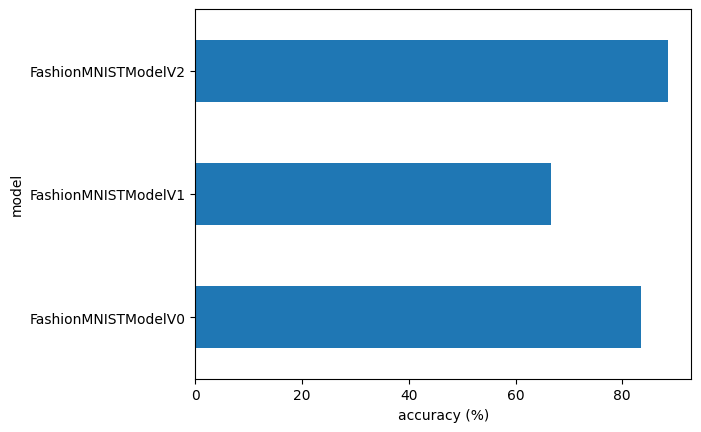

In [46]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

### Predict and evaluate random prediction with best model

In [47]:
def make_prediction( model: torch.nn.Module,
                    data: list,
                    device: torch.device=device):
    pred_probs=[]
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            #prepare sample (add batch size by adding dimension `unsqeeze()` and pass it to target device)
            sample=torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit= model(sample)

            #get prediction
            pred_prob=torch.softmax(pred_logit.squeeze(), dim=0)

            # prediction label
            pred_probs.append(pred_prob.cpu())
    #Stack the pred probs and turn it to the tensor
    return torch.stack(pred_probs)

In [48]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]
for sample ,label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)
#view the first sample shape 
test_samples[0].shape

torch.Size([1, 28, 28])

In [49]:
#make predicttion

pred_probs=make_prediction(model=model_2,
                           data=test_samples)

#View first two prediction probabilities
pred_probs[:2]


tensor([[1.1036e-04, 2.3759e-06, 3.7591e-05, 1.9903e-06, 4.4116e-05, 1.6144e-05,
         5.1770e-04, 2.7564e-04, 9.9787e-01, 1.1271e-03],
        [5.6372e-07, 7.4941e-09, 7.6481e-08, 9.8622e-08, 1.7382e-07, 6.2282e-04,
         2.0906e-06, 1.1303e-05, 1.0016e-05, 9.9935e-01]])

In [50]:
#convert prediction probabilities to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([8, 9, 3, 2, 2, 2, 1, 1, 6])

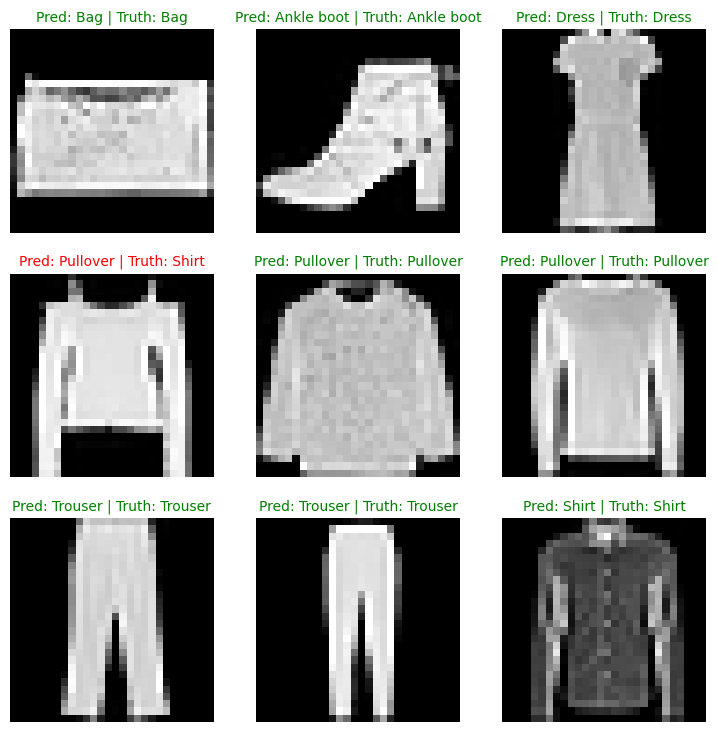

In [51]:
#plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
    #creat subplots
    plt.subplot(nrows,ncols, i+1)
    # show the target images
    plt.imshow(sample.squeeze(),cmap='gray')

    #find the prediction
    pred_label=class_name[pred_classes[i]]

    #get the truth label
    truth_label=class_name[test_labels[i]]

    # create title for plot
    title_text=f"Pred: {pred_label} | Truth: {truth_label}"

    #Check for equality
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)

### Making a confusion matrix
1. make predictions with our trained model
2. Make a confusion matrix
3. Plot them

In [52]:
#making the predictions

from tqdm.auto import tqdm

y_preds=[]
model_2.eval()

with torch.inference_mode():
    for X,y in tqdm(test_data_loader, desc="Making predictions....."):
        X,y= X.to(device), y.to(device)
        y_logit=model_2(X)
        # logits---> probabilities---> labels
        y_pred= torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

        #put the prediction to the CPU
        y_preds.append(y_pred.cpu())

#Concate list of predictions into a tensor
# print(y_preds)
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor

Making predictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [53]:
len(y_pred_tensor)

10000

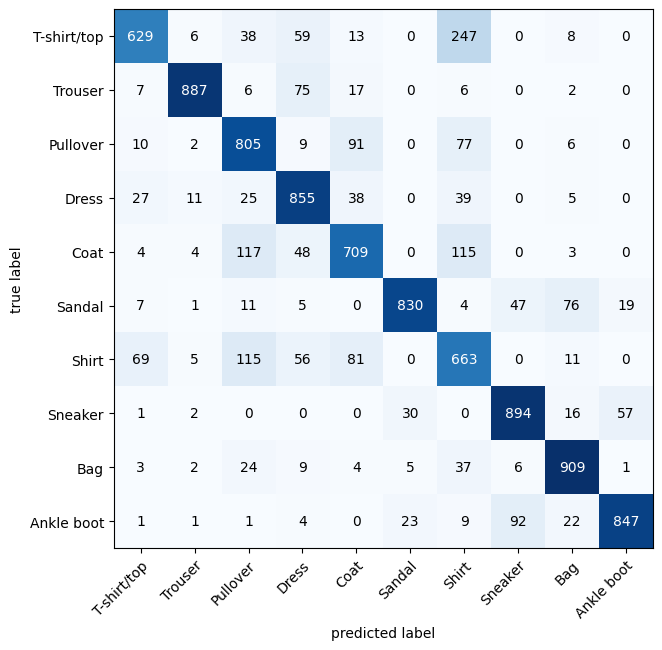

In [ ]:
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Define confusion matrix metric (specify task)
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_name))

# Generate confusion matrix tensor
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# Plot confusion matrix (without 'task' argument)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_name,
    figsize=(10,7)
)


### save the best model and reload it

In [62]:
from pathlib import Path

# create a model directory path
Model_path=Path('models')
Model_path.mkdir(parents=True,
                 exist_ok=True)

#Create Save the model
Model_name="03_Model.pth"
Model_Save_Path=Model_path/Model_name
Model_Save_Path

# Save the model
torch.save(obj=model_2.state_dict(),
           f=Model_Save_Path)

In [64]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2=FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_name))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=Model_Save_Path))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [66]:
# Evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_result=eval_model(
    model=loaded_model_2,
    data_loader=test_data_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3177203834056854,
 'model_acc': 88.52835463258786}